In [3]:
import keras

In [4]:
from keras.datasets import imdb

In [22]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [34]:
len(train_data[2])

141

In [25]:
import numpy as np
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
        results[i,sequences]=1
    return results
        

In [26]:
x_train = vectorize_sequence(train_data)

In [27]:
x_test = vectorize_sequence(test_data)

In [28]:
y_train = np.asarray(train_labels).astype('float32')

In [29]:
y_test = np.asarray(test_labels).astype('float32')

In [37]:
len(x_train[2])

10000

In [40]:
from keras import models
from keras import layers

In [41]:
model = models.Sequential()

In [42]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

In [43]:
model.add(layers.Dense(16, activation='relu'))

In [44]:
model.add(layers.Dense(1,activation='sigmoid'))

In [49]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [50]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[0:10000]
partial_y_train = y_train[10000:]

In [51]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 477us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 4s 251us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 4s 249us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3088 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 4s 251us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 4s 248us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 4s 250us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3086 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 4s 245us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

In [52]:
import matplotlib.pyplot as plt

In [53]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

20

In [63]:
history_dict = history.history
loss_values =history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc'])+1)

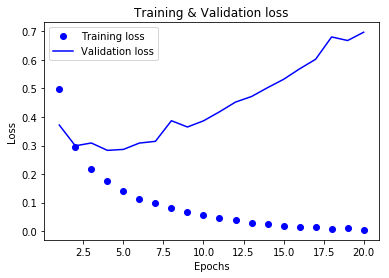

In [68]:
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [73]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop',loss ='binary_crossentropy',metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 4, batch_size = 512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 185us/step - loss: 0.4584 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 4s 169us/step - loss: 0.2630 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 4s 170us/step - loss: 0.2005 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 4s 176us/step


In [72]:
results

[0.3233712219238281, 0.87344]

In [77]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop',loss ='binary_crossentropy',metrics = ['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs = 4, batch_size = 512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 289us/step - loss: 0.5394 - acc: 0.7961 - val_loss: 0.4214 - val_acc: 0.8648
Epoch 2/4
15000/15000 [==============================] - 4s 265us/step - loss: 0.3423 - acc: 0.8987 - val_loss: 0.3304 - val_acc: 0.8866
Epoch 3/4
15000/15000 [==============================] - 4s 260us/step - loss: 0.2497 - acc: 0.9255 - val_loss: 0.2956 - val_acc: 0.8841
Epoch 4/4
25000/25000 [==============================] - 4s 168us/step


In [78]:
history_dict = history.history
loss_values =history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc'])+1)

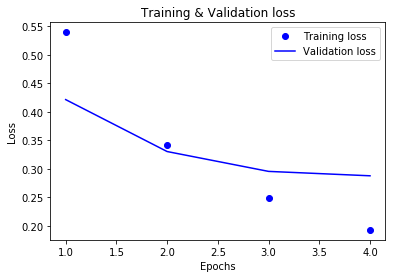

In [79]:
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop',loss ='binary_crossentropy',metrics = ['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs = 10, batch_size = 512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 5s 317us/step - loss: 0.4889 - acc: 0.8003 - val_loss: 0.3513 - val_acc: 0.8771
Epoch 2/10
15000/15000 [==============================] - 4s 278us/step - loss: 0.2788 - acc: 0.9070 - val_loss: 0.2878 - val_acc: 0.8920
Epoch 3/10
15000/15000 [==============================] - 4s 295us/step - loss: 0.2052 - acc: 0.9303 - val_loss: 0.2907 - val_acc: 0.8872
Epoch 4/10
15000/15000 [==============================] - 4s 270us/step - loss: 0.1602 - acc: 0.9490 - val_loss: 0.2772 - val_acc: 0.8889
Epoch 5/10
15000/15000 [==============================] - 4s 273us/step - loss: 0.1323 - acc: 0.9561 - val_loss: 0.2935 - val_acc: 0.8852
Epoch 6/10
15000/15000 [==============================] - 5s 322us/step - loss: 0.1062 - acc: 0.9665 - val_loss: 0.3115 - val_acc: 0.8841
Epoch 7/10
15000/15000 [==============================] - 4s 275us/step - loss: 0.0911 - acc: 0.9710 - val_loss: 0.3282 - 

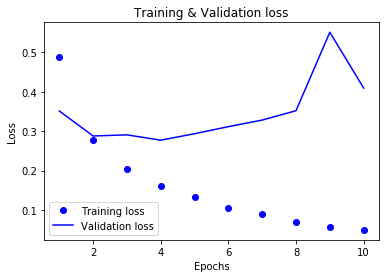

In [81]:
history_dict = history.history
loss_values =history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc'])+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

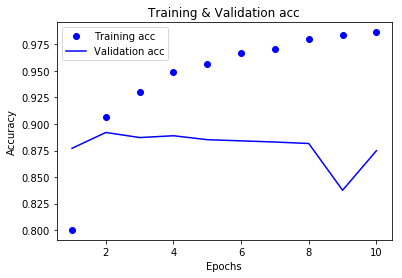

In [82]:
history_dict = history.history
acc_values =history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_dict['acc'])+1)
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training & Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop',loss ='binary_crossentropy',metrics = ['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs = 10, batch_size = 512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 5s 314us/step - loss: 0.5157 - acc: 0.7737 - val_loss: 0.3578 - val_acc: 0.8708
Epoch 2/10
15000/15000 [==============================] - 4s 272us/step - loss: 0.2757 - acc: 0.9069 - val_loss: 0.3128 - val_acc: 0.8753
Epoch 3/10
15000/15000 [==============================] - 4s 272us/step - loss: 0.1992 - acc: 0.9306 - val_loss: 0.3596 - val_acc: 0.8530
Epoch 4/10
15000/15000 [==============================] - 4s 273us/step - loss: 0.1576 - acc: 0.9458 - val_loss: 0.2907 - val_acc: 0.8855
Epoch 5/10
15000/15000 [==============================] - 4s 281us/step - loss: 0.1184 - acc: 0.9633 - val_loss: 0.3463 - val_acc: 0.8694
Epoch 6/10
15000/15000 [==============================] - 4s 273us/step - loss: 0.0984 - acc: 0.9679 - val_loss: 0.3287 - val_acc: 0.8787
Epoch 7/10
15000/15000 [==============================] - 4s 277us/step - loss: 0.0764 - acc: 0.9765 - val_loss: 0.3434 - 

In [85]:
model.predict(x_test)

array([[0.03468466],
       [0.9999982 ],
       [0.947397  ],
       ...,
       [0.01942014],
       [0.01633992],
       [0.9504164 ]], dtype=float32)

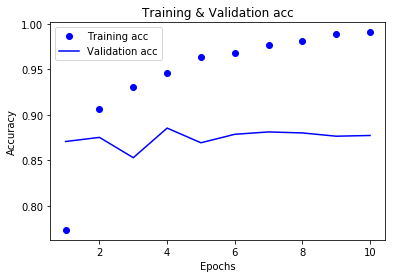

In [88]:
history_dict = history.history
acc_values =history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_dict['acc'])+1)
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training & Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [89]:
model = models.Sequential()
model.add(layers.Dense(32,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop',loss ='binary_crossentropy',metrics = ['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs = 10, batch_size = 512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 5s 334us/step - loss: 0.4748 - acc: 0.7991 - val_loss: 0.3534 - val_acc: 0.8729
Epoch 2/10
15000/15000 [==============================] - 4s 275us/step - loss: 0.2774 - acc: 0.9119 - val_loss: 0.2906 - val_acc: 0.8895
Epoch 3/10
15000/15000 [==============================] - 4s 275us/step - loss: 0.2079 - acc: 0.9322 - val_loss: 0.2733 - val_acc: 0.8906
Epoch 4/10
15000/15000 [==============================] - 4s 273us/step - loss: 0.1643 - acc: 0.9484 - val_loss: 0.3651 - val_acc: 0.8538
Epoch 5/10
15000/15000 [==============================] - 4s 278us/step - loss: 0.1356 - acc: 0.9577 - val_loss: 0.2794 - val_acc: 0.8865
Epoch 6/10
15000/15000 [==============================] - 4s 278us/step - loss: 0.1121 - acc: 0.9661 - val_loss: 0.2974 - val_acc: 0.8850
Epoch 7/10
15000/15000 [==============================] - 4s 277us/step - loss: 0.0928 - acc: 0.9736 - val_loss: 0.3144 - 

In [90]:
model.predict(x_test)

array([[0.0983842 ],
       [0.9999875 ],
       [0.97827816],
       ...,
       [0.08370763],
       [0.04974724],
       [0.76455635]], dtype=float32)

In [91]:
model = models.Sequential()
model.add(layers.Dense(32,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop',loss ='binary_crossentropy',metrics = ['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs = 3, batch_size = 512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 5s 319us/step - loss: 0.4653 - acc: 0.8065 - val_loss: 0.3630 - val_acc: 0.8661
Epoch 2/3
15000/15000 [==============================] - 4s 276us/step - loss: 0.2817 - acc: 0.9069 - val_loss: 0.2942 - val_acc: 0.8891
Epoch 3/3
25000/25000 [==============================] - 5s 191us/step


In [92]:
model.predict(x_test)

array([[0.25747624],
       [0.9962179 ],
       [0.7882261 ],
       ...,
       [0.14843382],
       [0.21827063],
       [0.5776572 ]], dtype=float32)

In [94]:
model = models.Sequential()
model.add(layers.Dense(32,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop',loss ='mse',metrics = ['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs = 3, batch_size = 512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 5s 328us/step - loss: 0.1556 - acc: 0.7831 - val_loss: 0.1037 - val_acc: 0.8754
Epoch 2/3
15000/15000 [==============================] - 4s 275us/step - loss: 0.0771 - acc: 0.9115 - val_loss: 0.1110 - val_acc: 0.8487
Epoch 3/3
25000/25000 [==============================] - 5s 189us/step


In [95]:
model.predict(x_test)

array([[0.27831474],
       [0.9974891 ],
       [0.95172423],
       ...,
       [0.17008723],
       [0.1929512 ],
       [0.6349906 ]], dtype=float32)

In [96]:
model.predict(x_train)

array([[0.98190063],
       [0.04305266],
       [0.02740792],
       ...,
       [0.03291084],
       [0.95415443],
       [0.16790986]], dtype=float32)